In [12]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from pathlib import Path
import csv
import glob
import os

In [13]:
gs = {'torino': -196, 'fez': -246, 'kyiv': -194}

In [14]:
res = {}
for which in ['fez']:
    for ang in [16]:
        for les in [0]:
            for p in range(50):
                fname = Path(f"./results_fig15/Hamiltonian_ibm_{which}_0/{ang}_{les}/{p=}/results.csv")
                try:
                    with open(fname, 'r') as f:
                        rd = csv.DictReader(f, delimiter=';', quotechar="'")
                        ind = (which, ang, les, p)
                        res[ind] = list(rd)                
                except FileNotFoundError:
                    pass

for k, v in res.items():
    for x in v:
        for kk in ["eng", "Delta", "chi", "D"]:
            x[kk] = float(x[kk])


In [15]:
res.keys()

dict_keys([('fez', 16, 0, 2), ('fez', 16, 0, 3), ('fez', 16, 0, 8), ('fez', 16, 0, 20)])

In [16]:
def plot_contraction_comparison(ax, which, ang, les, p, D):

    ind = (which, ang, les, p)

    tmp = {(x['D'], x['env'], x['chi']): float(x['eng']) for x in res[ind]}

    chis = np.array([2, 4, 6, 8])

    dE_mps, dE_ctm, chi_mps, chi_ctm = [], [], [], []
    for chi in chis:
        if (D, 'MPS', chi) in tmp:
                dE_mps.append(tmp[(D, 'BP', 1)] - tmp[(D, 'MPS', chi)])
                chi_mps.append(chi)
        if (D, 'CTM', chi) in tmp:
                dE_ctm.append(tmp[(D, 'BP', 1)] - tmp[(D, 'CTM', chi)])
                chi_ctm.append(chi)

    ax.plot(chi_mps, dE_mps, '-x', label='E(BP) - E(MPS)')
    ax.plot(chi_ctm, dE_ctm, '-o', label='E(BP) - E(CTM)')

    ax.set_xlabel('chi')
    ax.set_ylabel('difference')
    ax.set_ylim(-0.02, 0.02)
    ax.set_xlim(2, 8)
    ax.grid(which='major')
    ax.grid(which='minor')

    ax.set_title(f"{p=} {D=}")

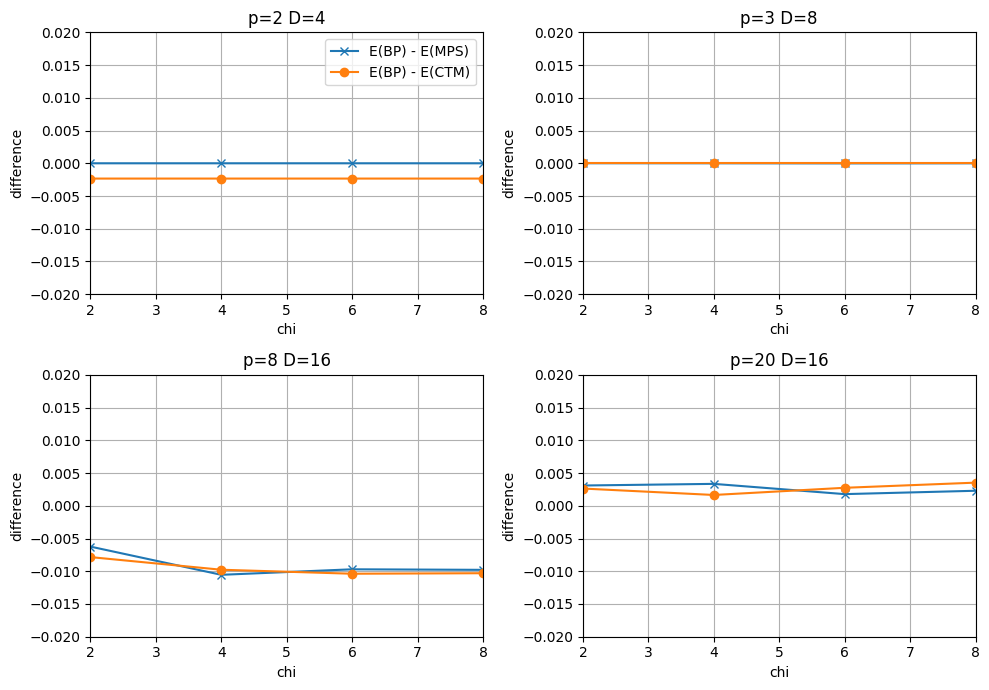

In [17]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)

plot_contraction_comparison(ax[0, 0], 'fez', 16, 0, 2, 4)
plot_contraction_comparison(ax[0, 1], 'fez', 16, 0, 3, 8)
plot_contraction_comparison(ax[1, 0], 'fez', 16, 0, 8, 16)
plot_contraction_comparison(ax[1, 1], 'fez', 16, 0, 20, 16)
ax[0, 0].legend() 
fig.tight_layout()

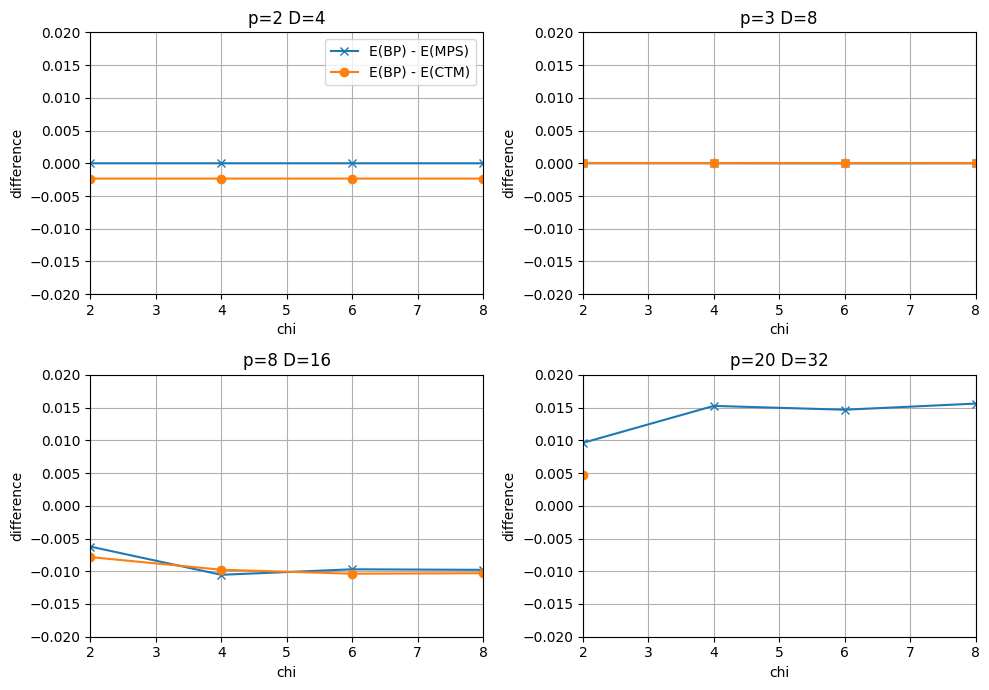

In [18]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)

plot_contraction_comparison(ax[0, 0], 'fez', 16, 0, 2, 4)
plot_contraction_comparison(ax[0, 1], 'fez', 16, 0, 3, 8)
plot_contraction_comparison(ax[1, 0], 'fez', 16, 0, 8, 16)
plot_contraction_comparison(ax[1, 1], 'fez', 16, 0, 20, 32)
ax[0, 0].legend() 
fig.tight_layout()